Importations des Packages

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

# D'autres importations
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /home/boy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/boy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Les importations d'autres Packages

In [2]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sn
from pprint import pprint
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
import pandas as pd
import re
import operator
import nltk
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /home/boy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Le chemin de mes textes

In [2]:
data_path = "../data/txt/"

## Nous choisissons la décennie de 1010-1919

In [3]:
decenie = '1910'

# Sélection des fichiers uniquement pour la décennie 1910-1919

files = [f for f in sorted(os.listdir(data_path)) if f"_{decenie[:-1]}" in f]

# La varible Texts pour stocker le contenu de l'ensemble des fichiers sélectionnés

texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [4]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [5]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

# Applications de vectorisation à mes textes

tfidf_vectors = vectorizer.fit_transform(texts)

# Détail de la matrice
tfidf_vectors

/home/boy/Documents/M-STIC/Machine Learning/Tp/tac/tac_venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<700x4042 sparse matrix of type '<class 'numpy.float64'>'
	with 576850 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [6]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

ft             0.498859
vend           0.303463
piano          0.210893
pianos         0.185838
occas          0.125603
                 ...   
efforts        0.000000
eglise         0.000000
ei             0.000000
electricité    0.000000
♦              0.000000
Length: 4042, dtype: float64

### Définissions d'un nombre de clusters et leurs applications

In [7]:
N_CLUSTERS = 5

# K-means
km_model = KMeans(n_clusters=N_CLUSTERS)

# Clusters

clusters = km_model.fit_predict(tfidf_vectors)

#  Clustering sur la liste de nos décennie
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])


# Affichage 
pprint(dict(clustering))

{0: ['KB_JB838_1910-01-07_01-00003.txt',
     'KB_JB838_1910-01-17_01-00002.txt',
     'KB_JB838_1910-01-22_01-00003.txt',
     'KB_JB838_1910-01-29_01-00003.txt',
     'KB_JB838_1910-01-30_01-00003.txt',
     'KB_JB838_1910-02-07_01-00002.txt',
     'KB_JB838_1910-02-09_01-00002.txt',
     'KB_JB838_1910-02-18_01-00001.txt',
     'KB_JB838_1910-02-24_01-00003.txt',
     'KB_JB838_1910-02-25_01-00002.txt',
     'KB_JB838_1910-03-06_01-00005.txt',
     'KB_JB838_1910-03-16_02-00001.txt',
     'KB_JB838_1910-03-19_01-00003.txt',
     'KB_JB838_1910-04-10_01-00001.txt',
     'KB_JB838_1910-04-12_01-00003.txt',
     'KB_JB838_1910-04-17_01-00002.txt',
     'KB_JB838_1910-04-29_01-00003.txt',
     'KB_JB838_1910-04-30_01-00002.txt',
     'KB_JB838_1910-05-14_01-00001.txt',
     'KB_JB838_1910-05-19_01-00002.txt',
     'KB_JB838_1910-05-31_01-00003.txt',
     'KB_JB838_1910-07-02_01-00001.txt',
     'KB_JB838_1910-07-02_01-00004.txt',
     'KB_JB838_1910-07-04_01-00002.txt',
     'KB_JB838_1

### Réduction des vecteurs à 2 dimensions à l'aide de l'algorithme PCA

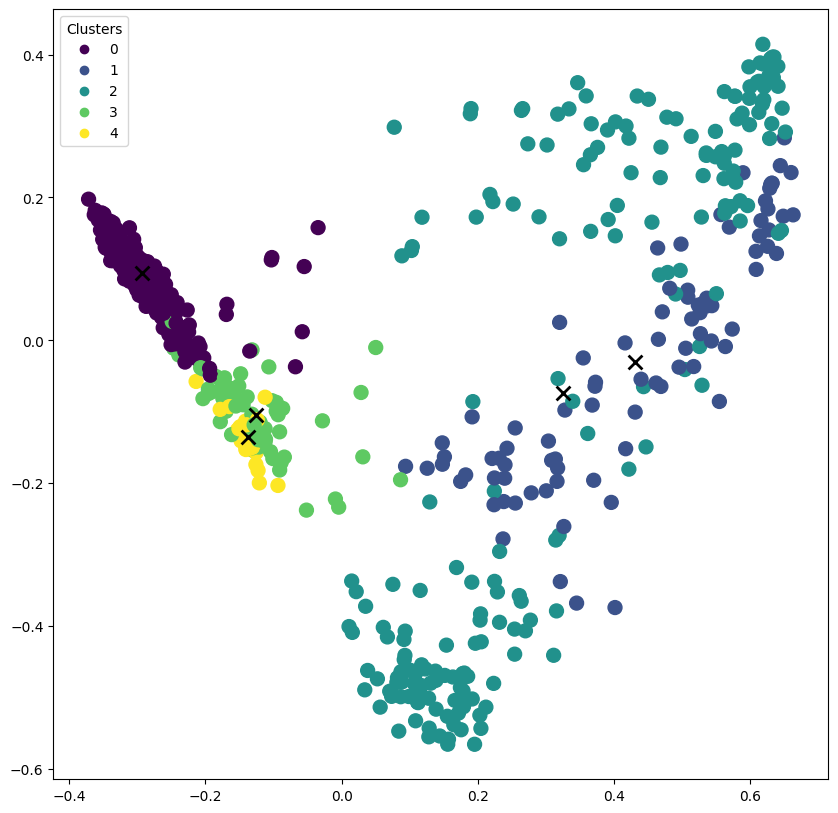

In [8]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

## Explorer le modèle

In [3]:
# Charger le modèle en mémoire

model = Word2Vec.load("../data/newspapers.model")

### Imprimer le vecteur d'un terme

In [4]:
model.wv["ministre"]

array([-0.20458974,  1.0407317 , -1.0037787 , -0.7584863 ,  0.41507876,
        1.0629541 ,  2.9048812 , -2.7401211 , -3.3415105 ,  0.45528534,
        4.299134  ,  3.4004807 ,  1.6627202 ,  0.00808998, -1.2558513 ,
       -2.41841   , -4.6482935 , -0.850808  , -2.1893528 ,  1.0065633 ,
        2.547234  ,  0.2263275 ,  0.20095348, -1.2661085 , -2.1400137 ,
        1.1487777 , -1.4847869 , -0.8182385 , -1.9441409 ,  0.36515456,
       -0.38283104,  2.737978  ], dtype=float32)

### Calculer la similarité entre deux termes

In [22]:
model.wv.similarity("justice", "equitable")

0.40644944

### Chercher les mots les plus proches d'un terme donné

In [23]:
model.wv.most_similar("paix", topn=10)

[('paix_du_canton', 0.8482169508934021),
 ('canton', 0.7901899218559265),
 ('instance', 0.7896087765693665),
 ('residence', 0.7689546346664429),
 ('la_justice', 0.7605776190757751),
 ('division', 0.7521724700927734),
 ('tribunal', 0.7401658296585083),
 (',_au_pretoire', 0.7389175891876221),
 ('bourgmestre', 0.734732985496521),
 ('justice', 0.7323321104049683)]

### Faire des recherches complexes à travers l'espace vectoriel

In [17]:
print(model.wv.most_similar(positive=['paris', 'londres','allemagne'], negative=['france', 'grande_bretagne'], topn=1))

[('berlin', 0.7519463300704956)]
